In this notebook, we will perform time series analysis to get the sales for forecasting for next 7 days.

In [ ]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
#importing the train dataset
df = pd.read_csv('/content/SuperStoreData.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
# Understanding the distribution of the concerned data. This will display information about numeric columns only.
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
#Understanding the type of data in every columns of the data set that we will be dealing with.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9653 entries, 0 to 9652
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9653 non-null   int64  
 1   Order ID       9653 non-null   object 
 2   Order Date     9653 non-null   object 
 3   Ship Date      9653 non-null   object 
 4   Ship Mode      9653 non-null   object 
 5   Customer ID    9653 non-null   object 
 6   Customer Name  9653 non-null   object 
 7   Segment        9653 non-null   object 
 8   Country        9653 non-null   object 
 9   City           9653 non-null   object 
 10  State          9653 non-null   object 
 11  Postal Code    9643 non-null   float64
 12  Region         9652 non-null   object 
 13  Product ID     9652 non-null   object 
 14  Category       9652 non-null   object 
 15  Sub-Category   9652 non-null   object 
 16  Product Name   9652 non-null   object 
 17  Sales          9652 non-null   float64
dtypes: float

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #converting the data type of 'Order Date' column to date time format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y') #converting the data type of 'Ship Date' column to date time format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [ ]:
print('Order Date Description\n')
print(df['Order Date'].describe()) #Displays the distribution of dates in 'Order Data' column
print('\nShip Date Description\n')
print(df['Ship Date'].describe()) #Displays the distribution of dates in 'Ship Data' column

Order Date Description

count                             9653
mean     2017-05-01 05:04:37.095203840
min                2015-01-03 00:00:00
25%                2016-05-25 00:00:00
50%                2017-06-26 00:00:00
75%                2018-05-18 00:00:00
max                2018-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count                             9653
mean     2017-05-05 04:05:23.712835328
min                2015-01-07 00:00:00
25%                2016-05-28 00:00:00
50%                2017-06-29 00:00:00
75%                2018-05-20 00:00:00
max                2019-01-05 00:00:00
Name: Ship Date, dtype: object


In [ ]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis


In [ ]:
# To forecast sales seven days later of the order date, let us create a new dataframe with only the target column i.e,
# the 'Sales' column and 'Order Date' as the index

new_data = pd.DataFrame(df['Sales'])
new_data

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300


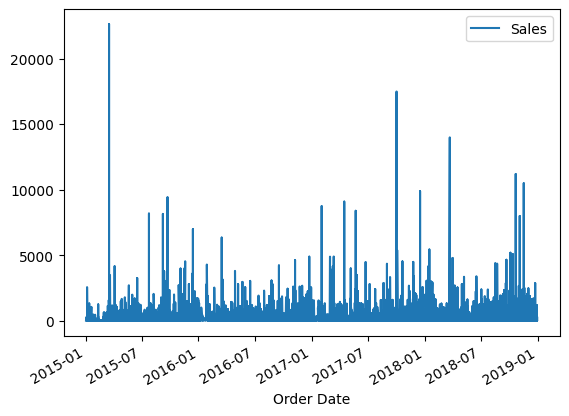

In [ ]:
#Plotting the data to understand the sales distribution from the year 2015-2018
new_data.plot();

A series is said to be stationary when its mean and variance do not change over time. From the above distribution of the sales it is not clear whether the sales distribution is stationary or not. Let us perform some stationarity tests to check whether the time series is stationary or not.

In [ ]:
# # Checkting for Stationarity
new_data =  pd.DataFrame(new_data['Sales'].resample('D').mean())
new_data = new_data.interpolate(method='linear') #The interpolate() function is used to interpolate values according to
#different methods. It ignore the index and treats the values as equally spaced.




In [ ]:
# Method 1
# To check for stationarity by comparing the change in mean and variance over time, let us split the data into train, test and validate.
train, test, validate = np.split(new_data['Sales'].sample(frac=1), [int(.6*len(new_data['Sales'])),int(.8*len(new_data['Sales']))])

In [ ]:
print('Train Dataset')
print(train)
print('Test Dataset')
print(test)
print('Validate Dataset')
print(validate)

Train Dataset
Order Date
2016-03-18    248.750455
2017-08-15    168.026600
2016-02-10     77.240000
2018-12-13     96.822667
2017-10-14    333.588800
                 ...    
2016-04-18    111.497778
2018-12-03     70.192100
2016-02-06    270.282667
2016-04-07    181.487200
2015-08-29    166.464500
Name: Sales, Length: 874, dtype: float64
Test Dataset
Order Date
2016-04-13     212.845200
2016-03-22     248.142400
2017-03-31     213.587333
2016-01-29    2509.095333
2015-09-05     148.152000
                 ...     
2015-10-06     123.677500
2018-12-01     156.799353
2018-10-01     248.205500
2015-06-04      91.254400
2015-03-15      74.156400
Name: Sales, Length: 292, dtype: float64
Validate Dataset
Order Date
2016-09-10    157.302889
2017-11-02    135.896667
2015-04-17     83.319250
2018-10-23    186.244111
2016-09-28     96.214909
                 ...    
2017-11-08    496.950000
2018-12-29    242.961167
2018-10-04     19.980000
2016-03-28     48.668800
2018-02-27    210.030833
Name:

In [ ]:
mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean() #taking mean of train, test and validate data
var1, var2, var3 = train.var(), test.var(), validate.var() #taking variance of train, test and validate data

print('Mean:')
print(mean1, mean2, mean3)
print('Variance:')
print(var1, var2, var3)

Mean:
222.6915706175314 218.39209884916346 226.16891914221435
Variance:
74702.33364898206 69532.73304115522 66505.04578117837


From the above values of mean and variance, it can be inferred that their is not much difference in the three values of mean and variance, indicating that the series is stationary. However, to verify our observations, let us perform a standard stationarity test, called Augmented Dicky Fuller test.

**Augmented Dicky Fuller test**



* The Augmented Dickey-Fuller test is a type of statistical test alsocalled a unit root test.The base of unit root test is that it helps in determining how strongly a time series is defined by a trend.

* The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary. The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

    1. Null Hypothesis(H0): Time series is not stationary
    2. Alternate Hypothesis (H1): Time series is stationary

* This result is interpreted using the p-value from the test.

   1. p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
   2. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [ ]:
# Method 2
# Augmented Dicky Fuller Test

from statsmodels.tsa.stattools import adfuller #importing adfuller tool from statsmodels
#statsmodels provide adfuller() fucntion to implement stationarity test of a time series

adf = adfuller(new_data)

print(adf)
print('\nADF = ', str(adf[0])) #more towards negative value the better
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in adf[4].items(): #for loop to print the p-value (1%, 5% and 10%) and their respective values
    print(key,':',val)


    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-20.809458514839335, 0.0, 2, 1455, {'1%': -3.4348523191002123, '5%': -2.8635284734563364, '10%': -2.567828646449617}, 20042.15494613892)

ADF =  -20.809458514839335

p-value =  0.0

Critical Values: 
1% : -3.4348523191002123
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.8635284734563364
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.567828646449617
Null Hypothesis Rejected. Time Series is Stationary


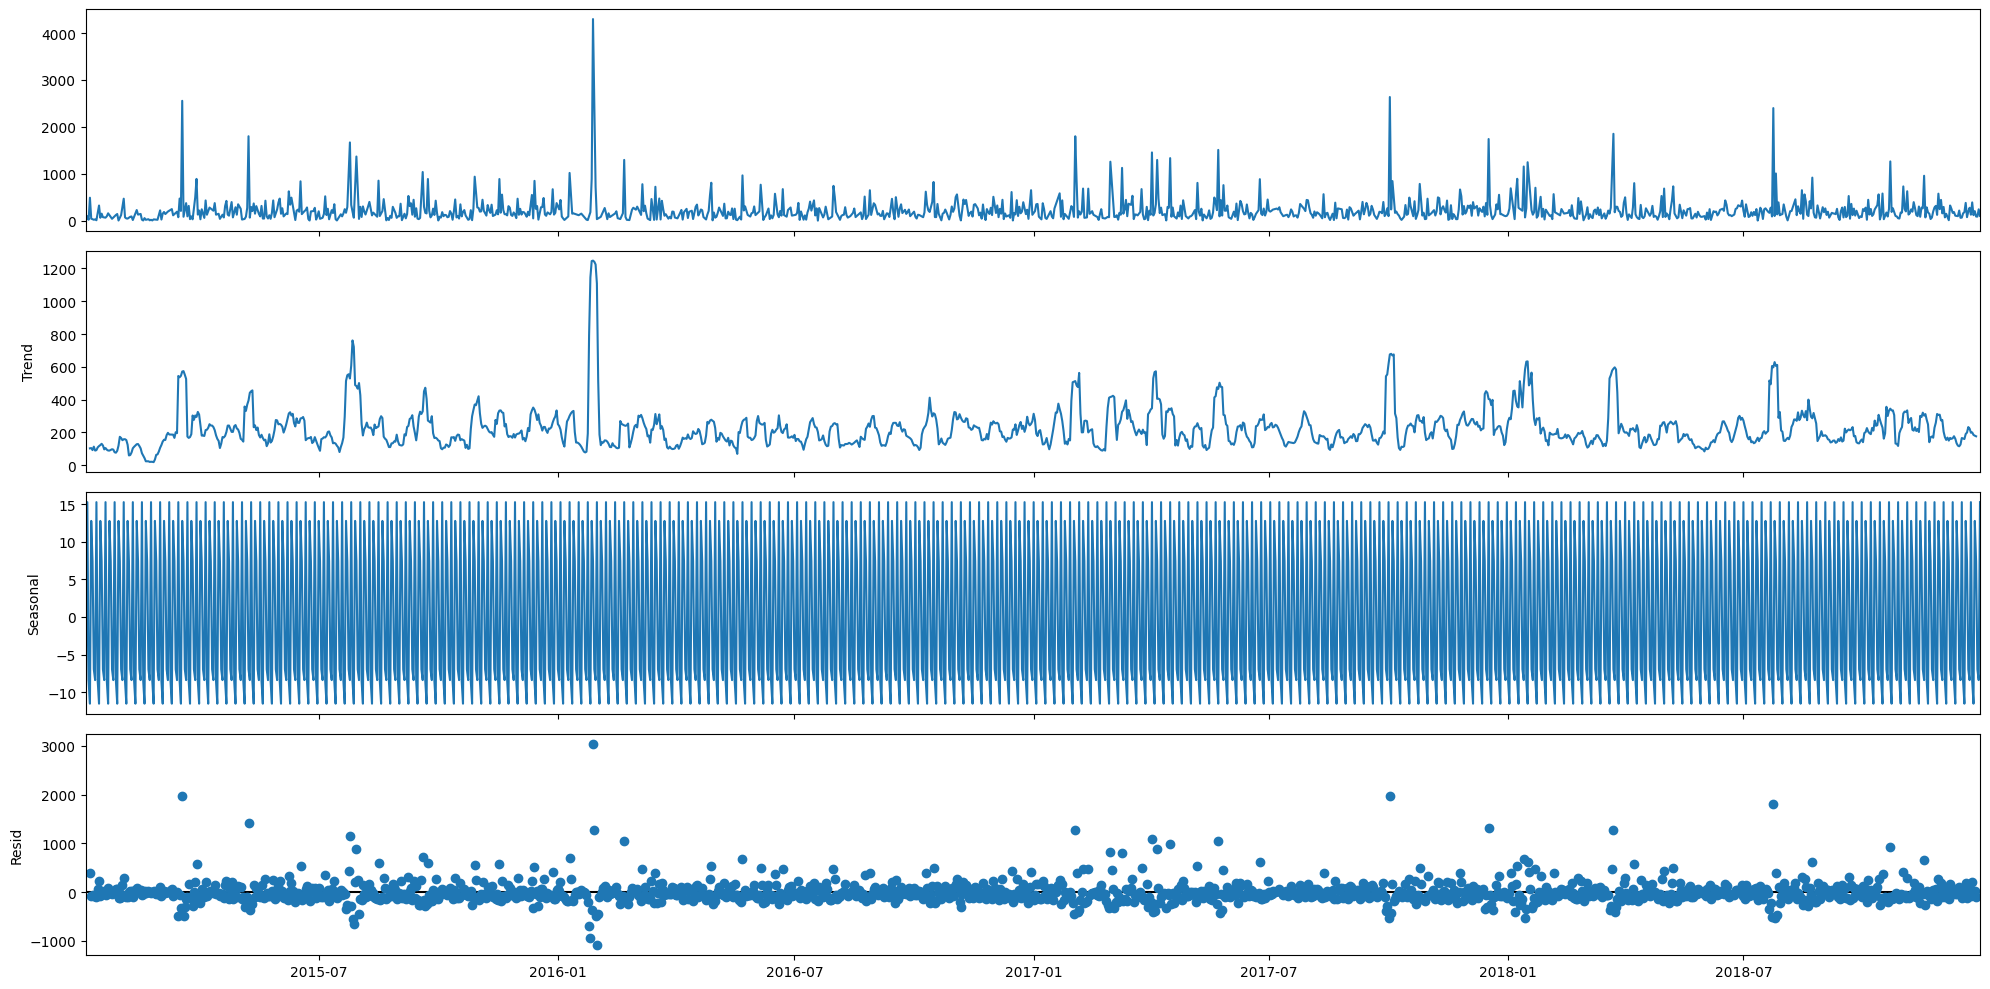

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(new_data, model='additive') #function used to decompose Time Series Data into Trend and Seasonality
fig = decomposition.plot()
plt.show();

### EDIT

In [ ]:
dataset = new_data

In [ ]:
dataset.tail()

,Sales
Order Date,
2018-12-26,203.648500
2018-12-27,88.818000
2018-12-28,87.228989
2018-12-29,242.961167
2018-12-30,101.970000


In [ ]:
dataset['Sale_LastMonth'] =dataset['Sales'].shift(+30)
dataset['Sale_2MonthsBack'] =dataset['Sales'].shift(+60)
dataset['Sale_3MonthsBack'] =dataset['Sales'].shift(+90)

In [ ]:
dataset

,Sales,Sale_LastMonth,Sale_2MonthsBack,Sale_3MonthsBack
Order Date,,,,
2015-01-03,16.448000,NaN,NaN,NaN
2015-01-04,96.020000,NaN,NaN,NaN
2015-01-05,19.536000,NaN,NaN,NaN
2015-01-06,489.677778,NaN,NaN,NaN
2015-01-07,43.579000,NaN,NaN,NaN
...,...,...,...,...
2018-12-26,203.648500,315.510750,90.526667,134.147550
2018-12-27,88.818000,124.481077,51.090750,55.927100
2018-12-28,87.228989,576.078667,46.960000,92.339000


In [ ]:
dataset.isnull().sum()

Sales                0
Sale_LastMonth      30
Sale_2MonthsBack    60
Sale_3MonthsBack    90
dtype: int64

In [ ]:
dataset.describe()

,Sales,Sale_LastMonth,Sale_2MonthsBack,Sale_3MonthsBack
count,1458.000000,1428.000000,1398.000000,1368.000000
mean,222.526920,223.732061,222.621162,222.456871
std,268.209217,270.532559,271.643096,272.351739
min,2.025000,2.025000,2.025000,2.025000
25%,90.480417,90.511250,89.974000,89.870843
50%,156.611143,156.756589,154.992817,154.431060
75%,261.591486,262.211455,260.181375,260.152125
max,4297.644000,4297.644000,4297.644000,4297.644000


In [ ]:
dataset.loc['2015-01-04	']

Sales               96.02
Sale_LastMonth        NaN
Sale_2MonthsBack      NaN
Sale_3MonthsBack      NaN
Name: 2015-01-04 00:00:00, dtype: float64

In [ ]:
dataset.loc['2015-02-03	']

Sales               48.556
Sale_LastMonth      96.020
Sale_2MonthsBack       NaN
Sale_3MonthsBack       NaN
Name: 2015-02-03 00:00:00, dtype: float64

In [ ]:
dataset.loc['2015-03-05	']

Sales               141.1124
Sale_LastMonth       48.5560
Sale_2MonthsBack     96.0200
Sale_3MonthsBack         NaN
Name: 2015-03-05 00:00:00, dtype: float64

In [ ]:
dataset.dropna(inplace =True)

In [ ]:
dataset.isnull().sum()

Sales               0
Sale_LastMonth      0
Sale_2MonthsBack    0
Sale_3MonthsBack    0
dtype: int64

In [ ]:
dataset.describe()

,Sales,Sale_LastMonth,Sale_2MonthsBack,Sale_3MonthsBack
count,1368.000000,1368.000000,1368.000000,1368.000000
mean,226.608916,229.436634,224.924671,222.456871
std,266.261645,274.215014,273.570362,272.351739
min,2.025000,2.025000,2.025000,2.025000
25%,94.436008,94.573775,91.392650,89.870843
50%,159.921881,161.582944,157.302309,154.431060
75%,264.051292,264.236276,261.723594,260.152125
max,4297.644000,4297.644000,4297.644000,4297.644000


In [ ]:
org = dataset

DIVIDING THE DATA INTO TRAIN_TEST

In [ ]:
import numpy as np
x1,x2,x3,y = dataset['Sale_LastMonth'],dataset['Sale_2MonthsBack'],dataset['Sale_3MonthsBack'],dataset['Sales']
x1,x2,x3,y = np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3),axis = 1)
print(final_x)

[[185.226       70.54866667  16.448     ]
 [141.1124      48.556       96.02      ]
 [168.122575    44.79466667  19.536     ]
 ...
 [576.07866667  46.96        92.339     ]
 [245.944      175.03173913  77.25142857]
 [443.0188     174.64266667 248.2055    ]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=final_x[:-180],final_x[-180:],y[:-180],y[-180:]
#X_train,X_test,y_train,y_test = train_test_split(final_x,y,test_size =0.2,random_state = 0)

APPLYING MODELS

<ipython-input-27-231a3034de79>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


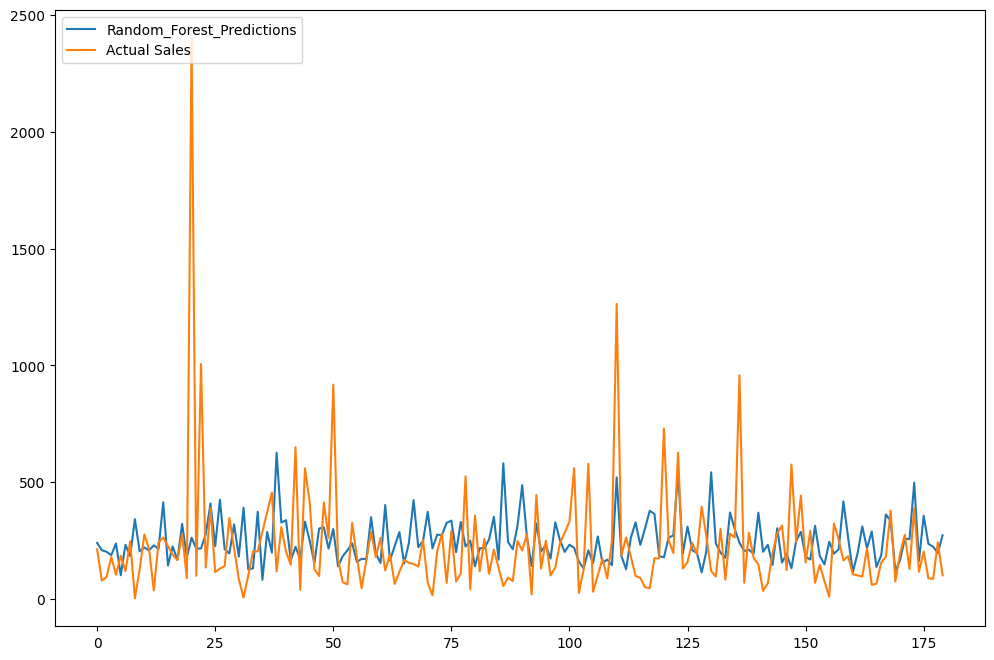

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

64431.0703125
6/6 [==============================] - 0s 2ms/step


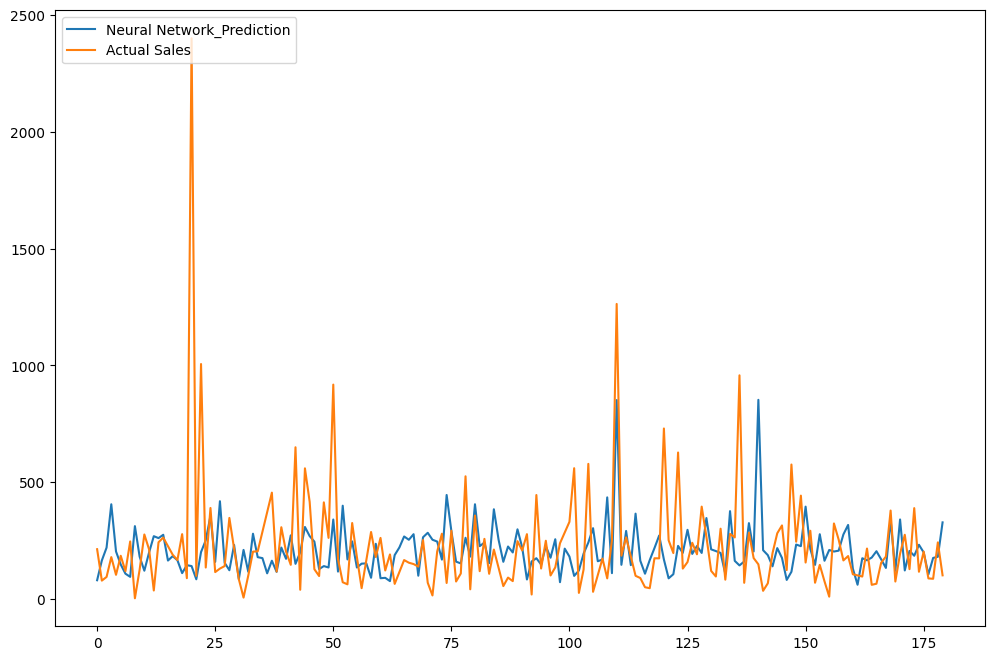

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network architecture
nn_model = Sequential()
nn_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # Output layer

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
nn_mse = nn_model.evaluate(X_test, y_test, verbose=0)
print(nn_mse)



nn_pred=nn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(nn_pred,label='Neural Network_Prediction')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

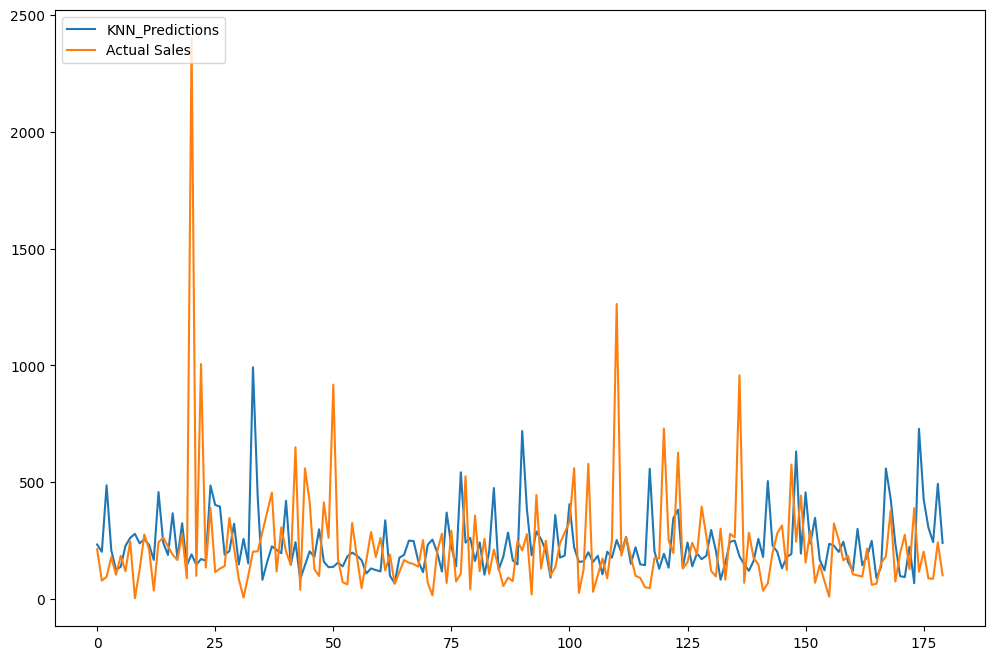

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_pred=knn_reg.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(knn_pred,label='KNN_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()


XGBoost MSE: 66105.96677502732


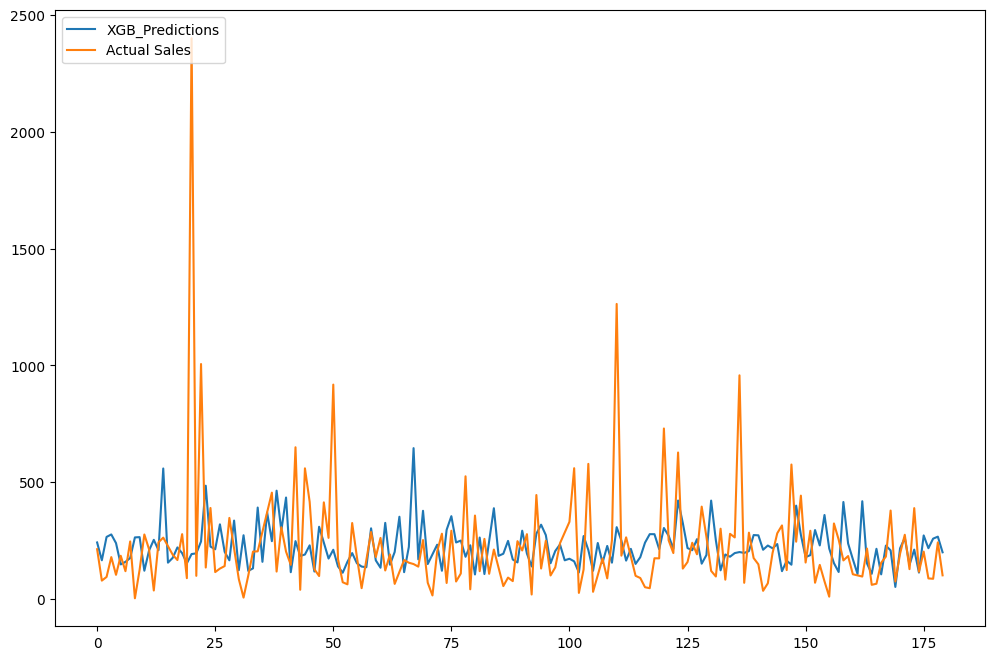

In [ ]:
# Importing necessary libraries
import xgboost as xgb


# Assuming X contains your features and y contains your target variable (sales)

# Splitting the dataset into training and testing sets


# Convert the dataset into DMatrix format, which is the format used by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error as evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 6,  # Maximum depth of each tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8  # Subsample ratio of columns when constructing each tree
}

# Training the model
num_round = 100  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

# Making predictions
y_pred = bst.predict(dtest)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("XGBoost MSE:", mse)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(y_pred,label='XGB_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()


<Axes: xlabel='Order Date'>

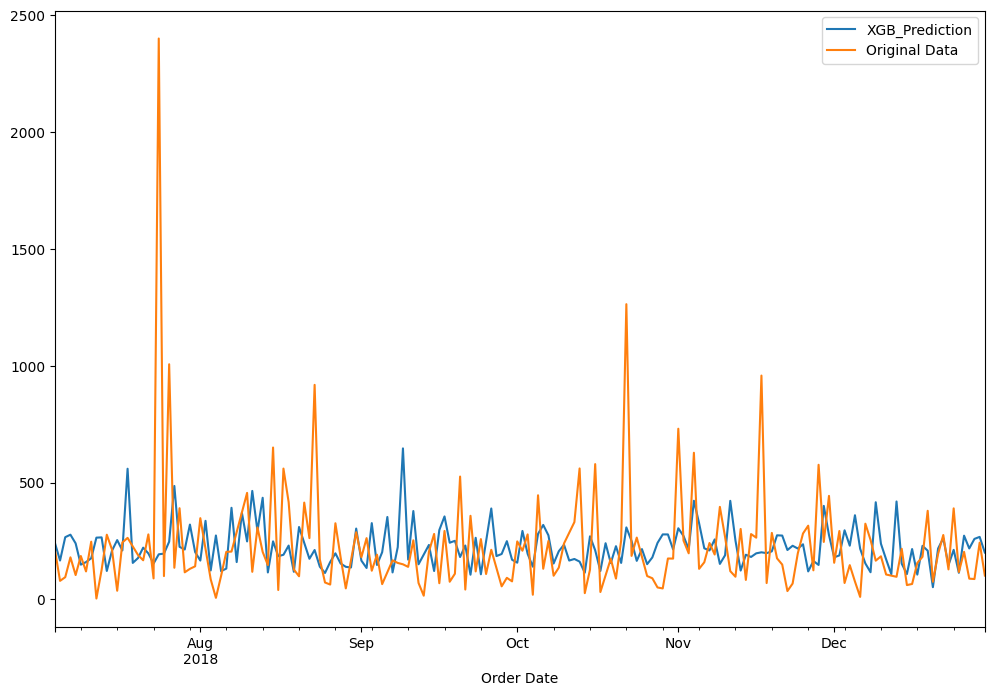

In [ ]:


plotframe = pd.concat([pd.DataFrame(y_pred, columns=['XGB_Prediction']), pd.DataFrame(y_test, columns=['Original Data'])],axis =1)
plotframe.set_index(new_data.iloc[-180:].index,inplace =True)
plotframe.plot()

CREATING FUTURE BASE for future data

In [ ]:


from datetime import datetime, timedelta
def createpdata(num_days):
  date_range = pd.date_range(start='2018-12-31', periods=num_days, freq='D')

  # Generate sample data for each column
  data = {
      'Sale_LastMonth': None,
      'Sale_2MonthsBack': None,
      'Sale_3MonthsBack': None,
      'Sales' : None
  }

  # Create the DataFrame
  pred_df = pd.DataFrame(data, index=date_range)

  i =1
  date = datetime(2018, 12, 31)
  while i<=num_days:
    lstmnth = date -timedelta(days=30)
    lst2mnth = date -timedelta(days=60)
    lst3mnth = date -timedelta(days=90)
    pred_df.at[date,'Sale_LastMonth']  = dataset.at[lstmnth,'Sales']
    pred_df.at[date,'Sale_2MonthsBack']  = dataset.at[lst2mnth,'Sales']
    pred_df.at[date,'Sale_3MonthsBack']  = dataset.at[lst3mnth,'Sales']

    date = date + timedelta(days = 1)
    i = i+1




  return pred_df

In [120]:
yyy = createpdata(30)
yyy

,Sale_LastMonth,Sale_2MonthsBack,Sale_3MonthsBack,Sales
2018-12-31,156.799353,730.3575,208.385462,None
2019-01-01,292.681824,251.77544,278.275556,None
2019-01-02,70.1921,197.25813,19.98,None
2019-01-03,146.646556,627.535059,445.641067,None
2019-01-04,76.480842,130.836889,131.202222,None
2019-01-05,10.68,158.842593,249.928182,None
2019-01-06,324.057111,241.3378,101.392667,None
2019-01-07,254.768033,192.05,136.053545,None
2019-01-08,165.769394,395.957667,239.358,None
2019-01-09,184.45519,267.169867,285.131765,None


In [121]:
dataset.loc['2018-12-30']

Sales               101.970000
Sale_LastMonth      443.018800
Sale_2MonthsBack    174.642667
Sale_3MonthsBack    248.205500
Name: 2018-12-30 00:00:00, dtype: float64

PREDICTING THE FUTURE

In [122]:
z1,z2,z3 = yyy['Sale_LastMonth'],yyy['Sale_2MonthsBack'],yyy['Sale_3MonthsBack']
z1,z2,z3 = np.array(z1),np.array(z2),np.array(z3)
z1,z2,z3 = z1.reshape(-1,1),z2.reshape(-1,1),z3.reshape(-1,1)
z_test = np.concatenate((z1,z2,z3),axis = 1)

knn_future_pred=knn_pred=knn_reg.predict(z_test)
pd.DataFrame(knn_future_pred)

,0
0,152.095898
1,122.952333
2,172.928954
3,525.940394
4,158.110513
5,215.176589
6,482.033536
7,167.591061
8,174.181301
9,398.468360


In [123]:
yyy['Sales'] = knn_future_pred
yyy

,Sale_LastMonth,Sale_2MonthsBack,Sale_3MonthsBack,Sales
2018-12-31,156.799353,730.3575,208.385462,152.095898
2019-01-01,292.681824,251.77544,278.275556,122.952333
2019-01-02,70.1921,197.25813,19.98,172.928954
2019-01-03,146.646556,627.535059,445.641067,525.940394
2019-01-04,76.480842,130.836889,131.202222,158.110513
2019-01-05,10.68,158.842593,249.928182,215.176589
2019-01-06,324.057111,241.3378,101.392667,482.033536
2019-01-07,254.768033,192.05,136.053545,167.591061
2019-01-08,165.769394,395.957667,239.358,174.181301
2019-01-09,184.45519,267.169867,285.131765,398.468360


In [124]:
yyy = yyy[['Sales','Sale_LastMonth', 'Sale_2MonthsBack', 'Sale_3MonthsBack']]
final_df = pd.concat([dataset, yyy])
final_df.tail(10)

,Sales,Sale_LastMonth,Sale_2MonthsBack,Sale_3MonthsBack
2019-01-20,164.134737,194.630909,149.078933,1263.23975
2019-01-21,76.615000,275.630407,35.712,186.244111
2019-01-22,309.021361,128.451733,67.829941,264.5425
2019-01-23,235.139589,389.565875,197.335875,182.26465
2019-01-24,166.589838,117.344652,282.012077,99.9868
2019-01-25,174.472450,203.6485,315.51075,90.526667
2019-01-26,252.675094,88.818,124.481077,51.09075
2019-01-27,195.559653,87.228989,576.078667,46.96
2019-01-28,175.712661,242.961167,245.944,175.031739
2019-01-29,211.482515,101.97,443.0188,174.642667


<Axes: >

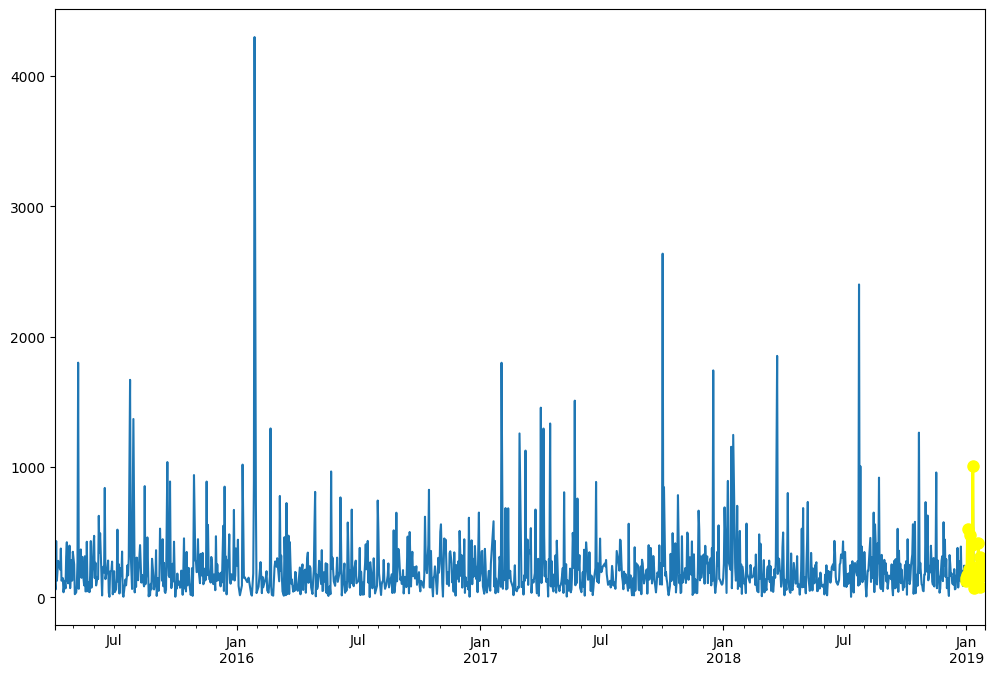

In [129]:
final_df['Sales'].plot(label= 'Past Data',linestyle='-')
yyy['Sales'].plot(color ='yellow',label = 'The Future',marker='o', markersize=8, linewidth=2)

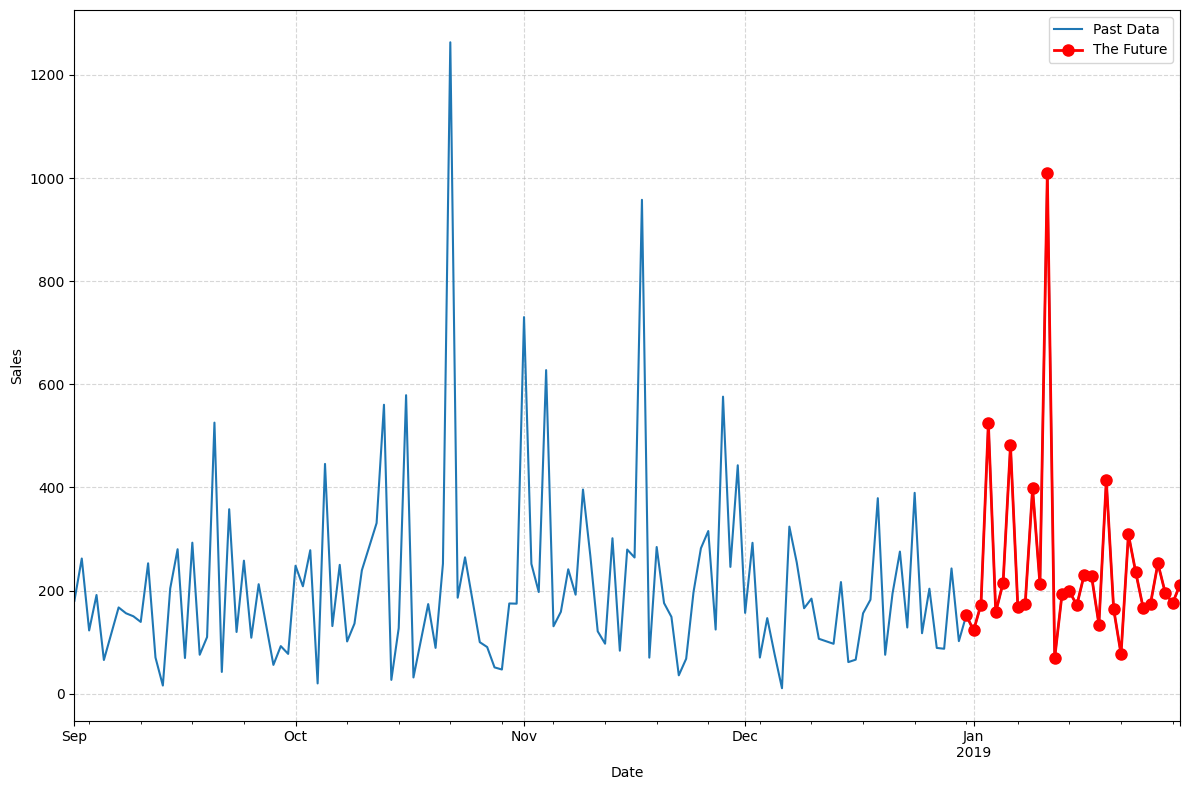

In [139]:
x =final_df.loc['2018-09-01':]
x['Sales'].plot(label= 'Past Data',linestyle='-')
yyy['Sales'].plot(color ='red',label = 'The Future',marker='o', markersize=8, linestyle='-',linewidth=2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with a dashed line style and reduced opacity
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()